In [0]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Flatten, Dense, Dropout
from keras.models import Model
import numpy as np
import glob
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [16]:
# Load du lieu
print("Load Data....")
# Load data
data_folder = './sexy/data/'
folder_list = ['normal','sexy']

data = []
label = []

for iv, folder in enumerate(folder_list):
    for file in glob.glob(data_folder + folder + "/*"):
        # Read
        image = cv2.imread(file)
        # Resize
        image = cv2.resize(image,dsize=(256,256))
        # Add to data
        data.append(image)
        label.append(iv)

print("Data length=",len(data))

Load Data....
Data length= 838


In [17]:
# Split train_test
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(label)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

# Change to numpy array
label = onehot_encoded
data = np.array(data)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [0]:
# Su dung CGG16
model_vgg16_conv = VGG16(weights='imagenet', include_top=False)

for layer in model_vgg16_conv.layers:
    layer.trainable = False

In [19]:
# Tao model
input = Input(shape=(256,256,3),name = 'image_input')
output_vgg16_conv = model_vgg16_conv(input)

# Them cac layer FC va Dropout
x = Flatten(name='flatten')(output_vgg16_conv)
x = Dense(4096, activation='relu', name='fc1')(x)
x = Dropout(0.5)(x)
x = Dense(4096, activation='relu', name='fc2')(x)
x = Dropout(0.5)(x)
x = Dense(2, activation='softmax', name='predictions')(x)

#Compile
model = Model(input=input, output=x)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("im..., outputs=Tensor("pr...)`
  


In [20]:
# Fit to model
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2)
hist = model.fit(X_train, y_train, epochs=2, validation_data=(X_test, y_test), verbose=1)

# Save model
model.save("cool_model.h5")
print("Finish model!")

Train on 670 samples, validate on 168 samples
Epoch 1/2
670/670 [==============================] - 621s 927ms/step - loss: 72.7811 - accuracy: 0.7284 - val_loss: 5.7024 - val_accuracy: 0.8750
Epoch 2/2
670/670 [==============================] - 608s 908ms/step - loss: 3.6228 - accuracy: 0.9149 - val_loss: 5.6725 - val_accuracy: 0.8929
Finish model!


In [0]:
from keras.models import load_model
# Dinh nghia class
class_name = ['normal','sexy']

# Load model da train
my_model = load_model("cool_model.h5")

In [0]:
def predict(file):
    # Doc anh
    image_org = cv2.imread(img_test)

    # Resize
    image = image_org.copy()
    image = cv2.resize(image, dsize=(256, 256))
    # Convert to tensor
    image = np.expand_dims(image, axis=0)

    #Predict
    predict = my_model.predict(image)
    print("This picture is: ", class_name[np.argmax(predict)])

    # Show image
    font = cv2.FONT_HERSHEY_SIMPLEX
    org = (50, 50)
    fontScale = 1
    color = (255, 0, 0)
    thickness = 2

    cv2.putText(image_org,class_name[np.argmax(predict)] , org, font, fontScale, color, thickness, cv2.LINE_AA)

    plt.imshow(image_org)

This picture is:  sexy


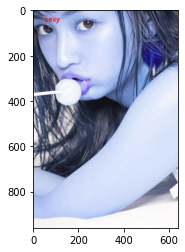

In [38]:
img_test = 'test7.jpg'
predict(img_test)